# Imbalanced Learning
Learning from [Website](https://imbalanced-learn.org/stable/index.html)

The learning phase and the subsequent prediction of machine learning algorithms can be affected by the problem of imbalanced data set. 

The balancing issue corresponds to the difference of the number of samples in the different classes. 

## 2. Over-sampling


[over-sampling page](https://imbalanced-learn.org/stable/over_sampling.html)

### 2.1.1. Naive random over-sampling

Generate new samples in the class which are under-represented. Most naive stretgy is to generate new samples by randomly sampling with replacement with current avilable samples. `RandomOverSampler` is used for this

In [1]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(np.int64(0), 4674), (np.int64(1), 4674), (np.int64(2), 4674)]


In [2]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_resampled, y_resampled)

LogisticRegression()

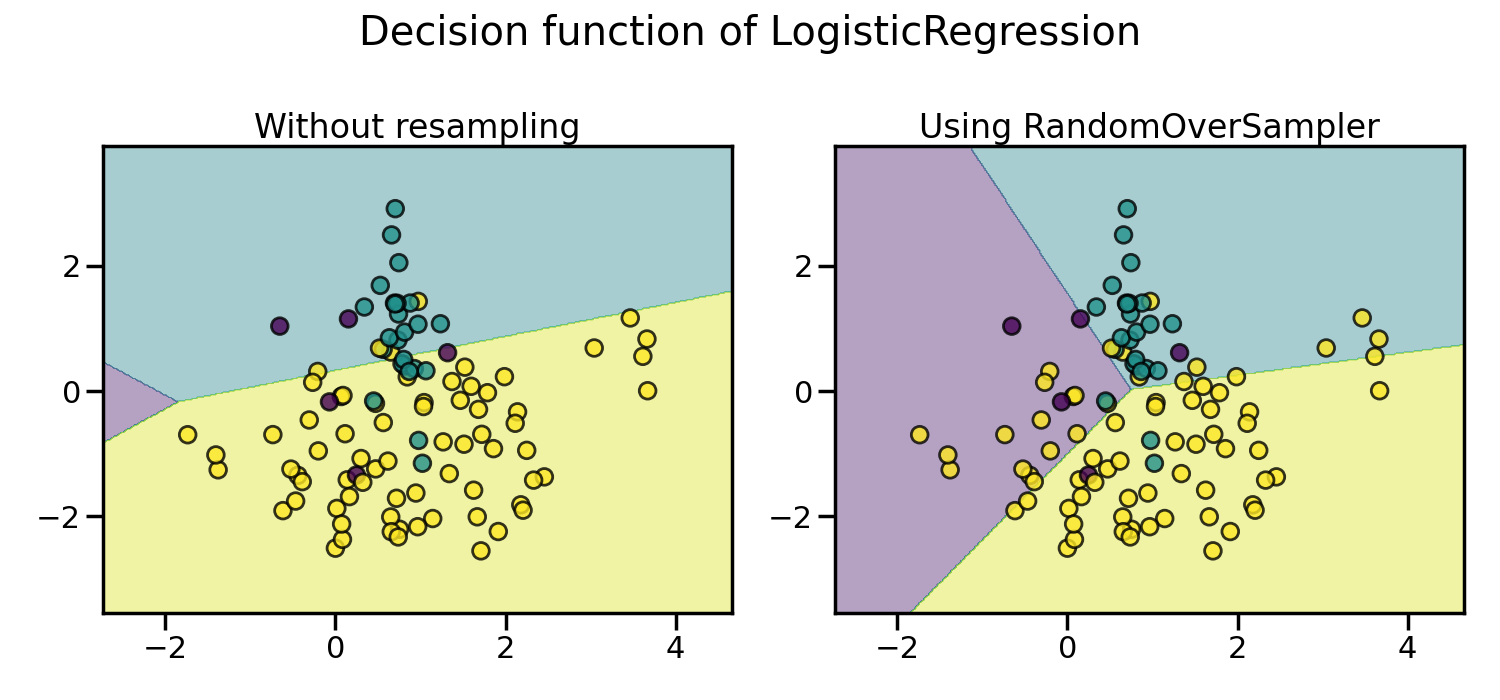

The majority class does not take over the other classes during the training process.

`RandomeOverSampler` allows to sample heterogeneous data

In [3]:
import numpy as np
X_hetero = np.array([['xxx', 1, 1.0], ['yyy', 2, 2.0], ['zzz', 3, 3.0]],
                    dtype=object)
y_hetero = np.array([0, 0, 1])
X_resampled, y_resampled = ros.fit_resample(X_hetero, y_hetero)
print(X_hetero)
print(y_hetero)


[['xxx' 1 1.0]
 ['yyy' 2 2.0]
 ['zzz' 3 3.0]]
[0 0 1]


In [4]:
print(X_resampled)
print(y_resampled)

[['xxx' 1 1.0]
 ['yyy' 2 2.0]
 ['zzz' 3 3.0]
 ['zzz' 3 3.0]]
[0 0 1 1]


In [5]:
# also works with pandas df

from sklearn.datasets import fetch_openml
df_adult, y_adult = fetch_openml(
    'adult', version=2, as_frame=True, return_X_y=True)
df_adult.head() 


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States


In [6]:
df_adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df_resampled, y_resampled = ros.fit_resample(df_adult, y_adult)
df_resampled.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States


In [8]:
df_resampled.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,74310.000000,7.431000e+04,74310.000000,74310.000000,74310.000000,74310.000000
mean,40.567366,1.891991e+05,10.611116,2053.640627,124.785843,42.151164
std,12.991245,1.043366e+05,2.616225,10396.080769,481.036814,12.185549
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,31.000000,1.178490e+05,9.000000,0.000000,0.000000,40.000000
50%,40.000000,1.776750e+05,10.000000,0.000000,0.000000,40.000000
75%,49.000000,2.364360e+05,13.000000,0.000000,0.000000,50.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


If repeating samples is an issue, the parameter `shrinkage` allows to create a smoothed bootstrap. However, the original data needs to be numerical. The `shrinkage` parameter controls the dispersion of the new generated samples. This way of generating smoothed bootstrap is also known a Random Over-Sampling Examples (ROSE)
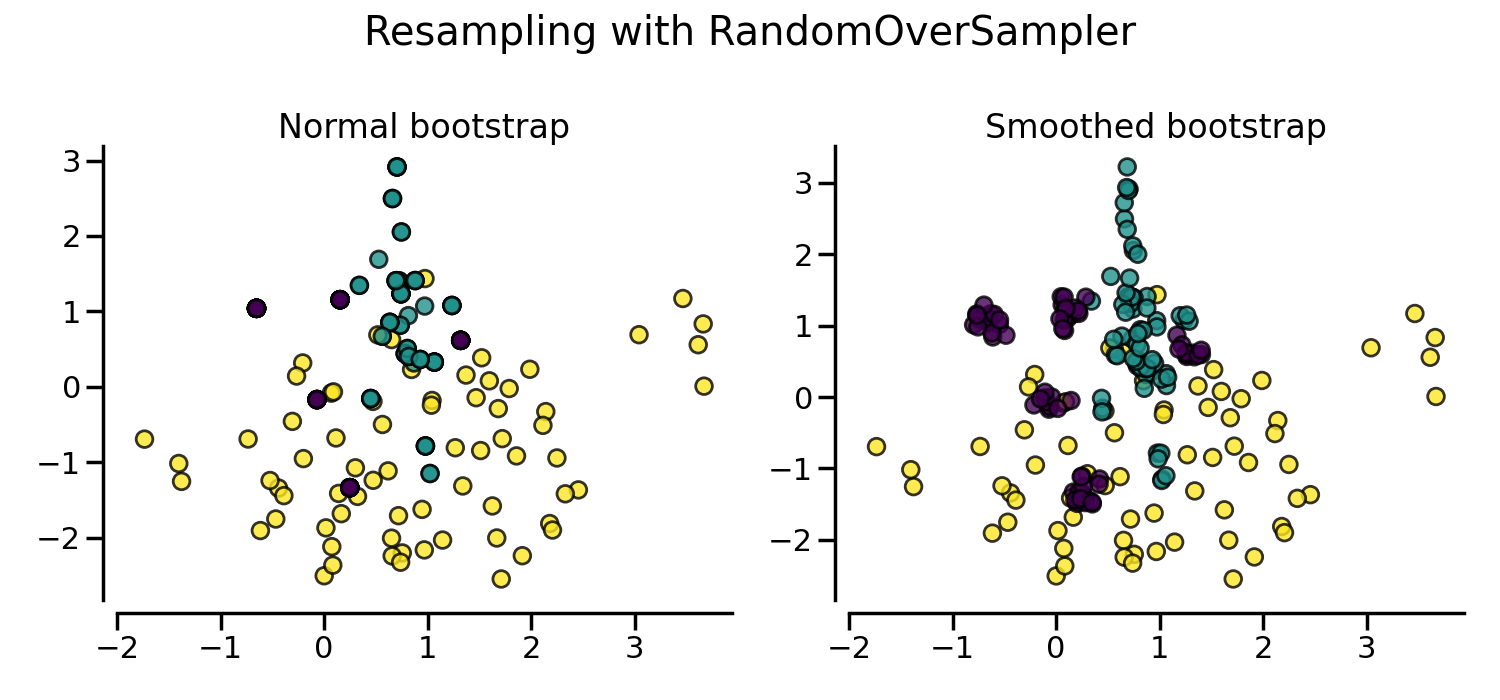

### 2.1.2. From random over-sampling to SMOTE and ADASYN

Apart from the random sampling with replacement, there are two popular methods to over-sample minority classes: (i) the Synthetic Minority Oversampling Technique (SMOTE) [CBHK02](https://imbalanced-learn.org/stable/zzz_references.html#id12) and (ii) the Adaptive Synthetic (ADASYN) [HBGL08](https://imbalanced-learn.org/stable/zzz_references.html#id11) sampling method. 

In [9]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

clf_smote = LogisticRegression().fit(X_resampled, y_resampled)
X_resampled, y_resampled = ADASYN().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

clf_adasyn = LogisticRegression().fit(X_resampled, y_resampled)

[(np.int64(0), 4674), (np.int64(1), 4674), (np.int64(2), 4674)]
[(np.int64(0), 4673), (np.int64(1), 4662), (np.int64(2), 4674)]


Examples of over-sampling methods
![](https://imbalanced-learn.org/stable/_images/sphx_glr_plot_comparison_over_sampling_004.png)


### 2.1.3 Ill-posed examples

`SMOTE` and `ADASYN` generate new samples in by interpolation. The samples used to interpolate/generate new synthetic samples differ. In fact, `ADASYN` focuses on generating samples next to the original samples which are wrongly classified using a k-Nearest Neighbors classifier while the basic implementation of `SMOTE` will not make any distinction between easy and hard samples to be classified using the nearest neighbors rule


![](https://imbalanced-learn.org/stable/_images/sphx_glr_plot_comparison_over_sampling_005.png)

![](https://imbalanced-learn.org/stable/_images/sphx_glr_plot_comparison_over_sampling_006.png)

### 2.1.4. SMOTE variants

`SMOTE` might connect inliers and outliers while `ADASYN` might focus solely on outliers which, in both cases, might lead to a sub-optimal decision function.
In this regard, `SMOTE` offers three additional options to generate samples. 
Those methods focus on samples near the border of the optimal decision function and will generate samples in the opposite direction of the nearest neighbors class 

![](https://imbalanced-learn.org/stable/_images/sphx_glr_plot_comparison_over_sampling_007.png)

The `BorderlineSMOTE` [HWM05](https://imbalanced-learn.org/stable/zzz_references.html#id13), `SVMSMOTE` [NCK09](https://imbalanced-learn.org/stable/zzz_references.html#id14), and `KMeansSMOTE` [LDB17](https://imbalanced-learn.org/stable/zzz_references.html#id15) offer some variant of the `SMOTE` algorithm:

In [14]:
from imblearn.over_sampling import BorderlineSMOTE
X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(np.int64(0), 4674), (np.int64(1), 4674), (np.int64(2), 4674)]


When dealing with mixed data type such as continuous and categorical features, none of the presented methods (apart of the class RandomOverSampler) can deal with the categorical features. 
The `SMOTENC` [CBHK02](https://imbalanced-learn.org/stable/zzz_references.html#id12) is an extension of the `SMOTE` algorithm for which categorical data are treated differently:



In [16]:
# create a synthetic data set with continuous and categorical features
rng = np.random.RandomState(42)
n_samples = 50
X = np.empty((n_samples, 3), dtype=object)
X[:, 0] = rng.choice(['A', 'B', 'C'], size=n_samples).astype(object)
X[:, 1] = rng.randn(n_samples)
X[:, 2] = rng.randint(3, size=n_samples)
y = np.array([0] * 20 + [1] * 30)
print(sorted(Counter(y).items()))

[(np.int64(0), 20), (np.int64(1), 30)]


In this data set, the first and last features are considered as categorical features.
 One needs to provide this information to `SMOTENC` via the parameters categorical_features either by passing the indices, the feature names when X is a pandas DataFrame, a boolean mask marking these features, or relying on dtype inference if the columns are using the pandas.CategoricalDtype:

In [18]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 2], random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))
print(X_resampled[-5:])

[(np.int64(0), 30), (np.int64(1), 30)]
[['A' 0.1989993778979113 2]
 ['B' -0.3657680728116921 2]
 ['B' 0.8790828729585258 2]
 ['B' 0.3710891618824609 2]
 ['B' 0.3327240726719727 2]]


However, `SMOTENC` is only working when data is a mixed of numerical and categorical features.
 If data are made of only categorical data, one can use the `SMOTEN` variant [CBHK02](https://imbalanced-learn.org/stable/zzz_references.html#id12).
The algorithm changes in two ways:

* the nearest neighbors search does not rely on the Euclidean distance. Indeed, the value difference metric (VDM) also implemented in the class ValueDifferenceMetric is used.

* a new sample is generated where each feature value corresponds to the most common category seen in the neighbors samples belonging to the same class.

In [19]:
import numpy as np
X = np.array(["green"] * 5 + ["red"] * 10 + ["blue"] * 7,
             dtype=object).reshape(-1, 1)
y = np.array(["apple"] * 5 + ["not apple"] * 3 + ["apple"] * 7 +
             ["not apple"] * 5 + ["apple"] * 2, dtype=object)

We generate a dataset associating a color to being an apple or not an apple. 
We strongly associated “green” and “red” to being an apple. The minority class being “not apple”, we expect new data generated belonging to the category “blue”:

In [20]:
from imblearn.over_sampling import SMOTEN
sampler = SMOTEN(random_state=0)
X_res, y_res = sampler.fit_resample(X, y)
X_res[y.size:]
y_res[y.size:]

array(['not apple', 'not apple', 'not apple', 'not apple', 'not apple',
       'not apple'], dtype=object)